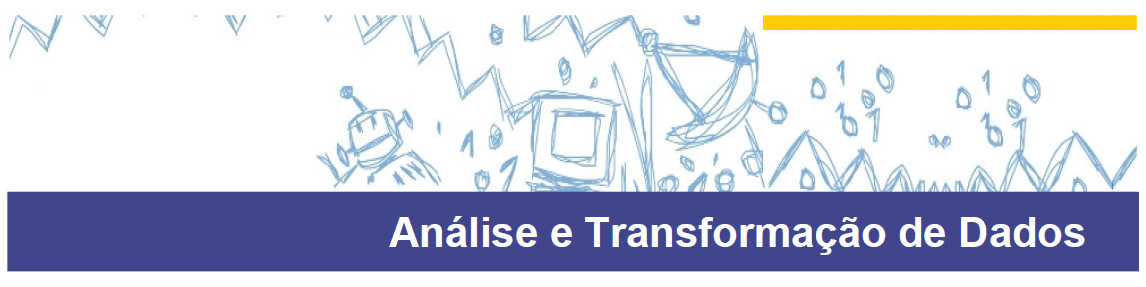
### Uma Resolução da Ficha Prática nº 7 de ATD 2022 usando Python
Alberto Cardoso ©DEI2021/2022

Objetivo: Pretende-se continuar a ilustrar os conceitos de frequência e efetuar a análise de sinais periódicos, de tempo contínuo e de tempo discreto, pela Série de Fourier trigonométrica e complexa. Pretende-se também aplicar o Teorema da Amostragem para determinar a frequência de amostragem a usar na obtenção da representação em tempo discreto de um sinal e usar a Transformada de Fourier Discreta (DFT) para ilustrar os conceitos de frequência em sinais de tempo discreto.

**Exercício 1.** Considerar uma sequência de dados $x[n]$ que resultou da amostragem de um determinado sinal de tempo contínuo $x(t)$ com um período de amostragem $Ts = 4ms$ (datasetfp7.dat disponível no Nónio).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

**Exercício 1.1**  Assumindo que o sinal é periódico, utilizar o script, com eventuais adaptações, da ficha 6 para:

In [2]:
# Função SerieFourier

def SerieFourier(t,x,T0,m_max):
    # t e x devem ser vetores coluna
    A=np.zeros([len(t),2*m_max+2])
    
    for k in range(0,m_max+1):
        A[:,k] = np.cos(2*np.pi/T0*t*k)
        A[:,m_max+1+k+1-1]=-np.sin(2*np.pi/T0*t*k)

    coef=np.dot(np.linalg.pinv(A),x)
    
    a=coef[1-1:m_max+1]
    b=coef[m_max+2-1:2*m_max+2]

    for lin in range(0,len(a)):
        if abs(a[lin])<0.001 and abs(b[lin])<0.001:
            a[lin]=0
            b[lin]=0
    
    Cm=abs(a+b*1j)          # <=> Cm=(a.^2+b.^2).^0.5
    tetam=np.angle(a+b*1j)  # <=> tetam=atan(b./a)
    
    return Cm, tetam

**Exercício 1.1.1.**	Determinar e representar graficamente os valores dos coeficientes ($Cm$ e $\theta m$) da Série de Fourier trigonométrica do sinal $x[n]$ com um valor adequado de $m\_max$ (sugestão: $m\_max = 80$) da Série de Fourier.

FP7 - Exercício 1.1.1


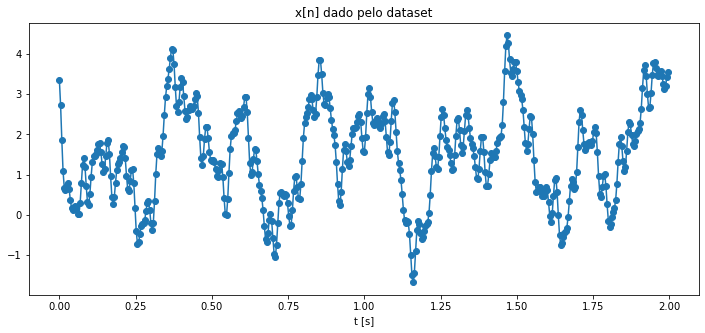

In [3]:
print('FP7 - Exercício 1.1.1');

x = np.genfromtxt('datasetfp7.dat', dtype='float')    # dataset com o sinal

Ts=4*10**-3  # Ts = 4ms
ws=2*np.pi/Ts
N=len(x)     # período de x[n]
Omega0=2*np.pi/N
T0=N*Ts      # período de x(t)
w0=2*np.pi/T0

n=np.arange(0,N-1+1).T
t=n*Ts

#--- Representação gráfica
plt.figure(figsize=(12,5))
plt.plot(t,x,'-o')
plt.xlabel('t [s]')
plt.title('x[n] dado pelo dataset')
plt.show()

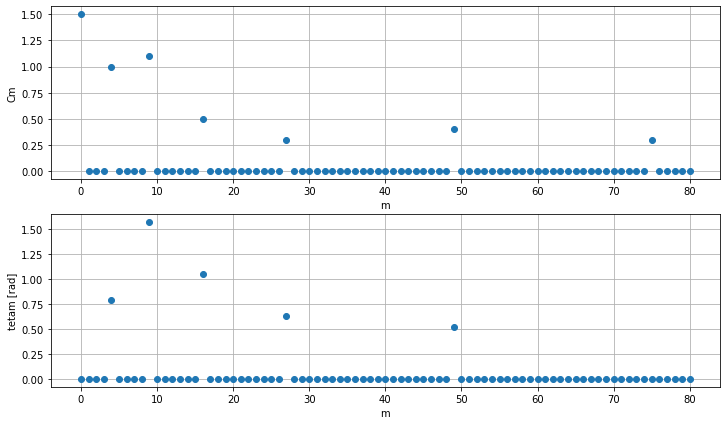

In [4]:
m_max = 80
Cm,tetam = SerieFourier(t,x,T0,m_max)

m=np.arange(m_max+1)

#--- Representação gráfica
plt.figure(figsize=(12,7))
plt.subplot(2,1,1)
plt.plot(m,Cm,'o')
plt.ylabel('Cm')
plt.xlabel('m')
plt.grid()
plt.subplot(2,1,2)
plt.plot(m,tetam,'o')
plt.ylabel('tetam [rad]')
plt.xlabel('m')
plt.grid()
plt.show()

**1.1.2.**	Obter e representar graficamente a sobreposição do sinal original e dos sinais aproximados a partir dos coeficientes da Série de Fourier trigonométrica para vários valores de $m\_max$.

FP7 - Exercício 1.1.2


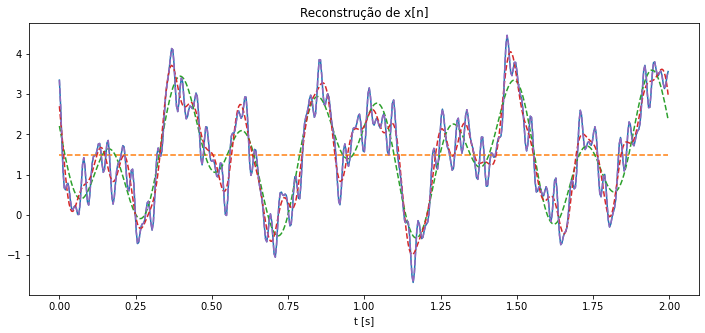

In [5]:
print('FP7 - Exercício 1.1.2')

mt=[0, 10, 40, 80]

#--- Representação gráfica
plt.figure(figsize=(12,5))
plt.plot(t,x)
plt.xlabel('t [s]')
plt.title('Reconstrução de x[n]')

for k in range(len(mt)):
    xa=np.zeros_like(t)
    for m in range(mt[k]+1):
        xa=xa+Cm[m]*np.cos(m*2*np.pi/T0*t+tetam[m])
    plt.plot(t,xa,'--')

plt.show()

#plt.hold( off)

**1.1.3.**	Obter e representar graficamente a amplitude e a fase dos valores do coeficiente $cm$ da Série de Fourier complexa do sinal $x[n]$, a partir dos coeficientes ($Cm$ e $\theta m$).

FP7 - Exercício 1.1.3


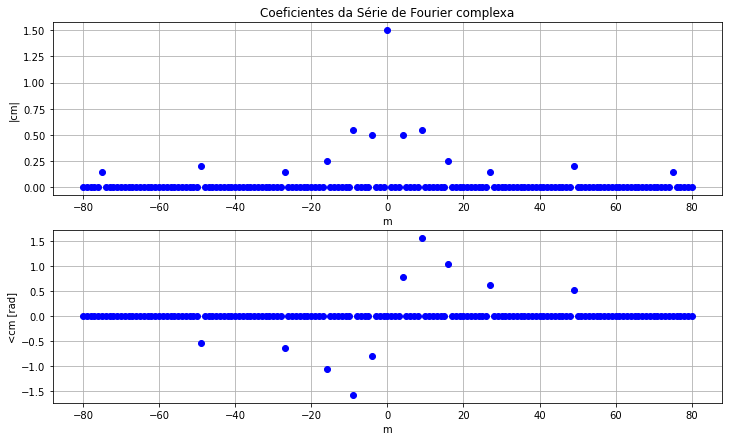

In [6]:
print('FP7 - Exercício 1.1.3')

cmneg = Cm[-1:0:-1]/2.*np.exp(-1j*tetam[-1:0:-1])
c0 = np.array([Cm[0]*np.cos(tetam[0])])
cmpos = Cm[1:]/2.*np.exp(1j*tetam[1:])
cm = np.concatenate((cmneg, c0, cmpos),axis=0)

m = np.arange(-m_max,m_max+1)

#--- Representação gráfica
plt.figure(figsize=(12,7))
plt.subplot(2,1,1)
plt.plot(m,abs(cm),'bo')
plt.title('Coeficientes da Série de Fourier complexa')
plt.ylabel('|cm|')
plt.xlabel('m')
plt.grid()
plt.subplot(2,1,2)
plt.plot(m,np.unwrap(np.angle(cm)),'bo')
plt.ylabel('<cm [rad]')
plt.xlabel('m')
plt.grid()
plt.show() 

**1.1.4.**	Determinar e representar graficamente a Transformada de Fourier Discreta (DFT) do sinal $x[n]$, usando as funções do Matlab *fft* e *fftshift*, em módulo e em fase, em função da frequência angular $\omega$ (em $rad/s$) e em função da frequência angular $\Omega$ (em $rad$). Comparar os resultados obtidos com os valores do coeficiente $cm$ da Série de Fourier complexa do sinal $x[n]$.

FP7 - Exercício 1.1.4


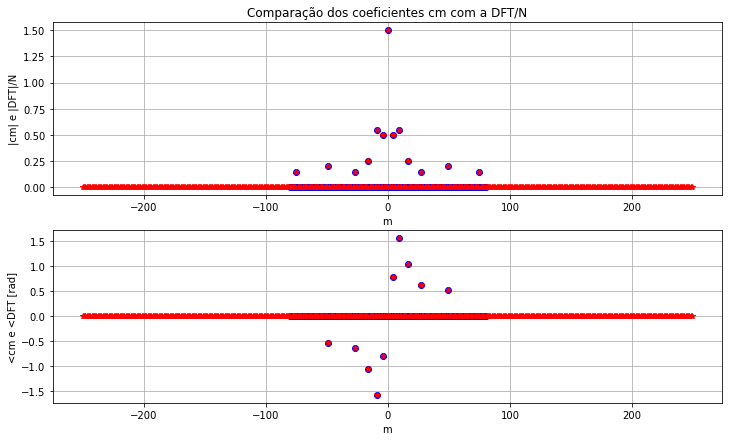

In [7]:
print('FP7 - Exercício 1.1.4');

X=np.fft.fftshift(np.fft.fft(x))    # DFT de x[n]
X[np.where(abs(X)<0.001)]=0      # anular valores residuais

if np.mod(N,2)==0:   # definição de w e Omega
    w=np.linspace(-ws/2,ws/2-ws/N,N)
    Omega=np.linspace(-np.pi,np.pi-2*np.pi/N,N)
else:
    w=np.linspace(-ws/2+ws/N/2,ws/2-ws/N/2,N)
    Omega=np.linspace(-np.pi+np.pi/N,np.pi-np.pi/N,N)

#--- Representação gráfica
plt.figure(figsize=(12,7))
plt.subplot(2,1,1)
plt.plot(m,abs(cm),'bo',w/w0,abs(X)/N,'r*')
plt.title('Comparação dos coeficientes cm com a DFT/N')
plt.ylabel('|cm| e |DFT|/N')
plt.xlabel('m')
plt.grid()
plt.subplot(2,1,2)
plt.plot(m,np.unwrap(np.angle(cm)),'bo',w/w0,np.unwrap(np.angle(X)),'r*')
plt.ylabel('<cm e <DFT [rad]')
plt.xlabel('m')
plt.grid()
plt.show()

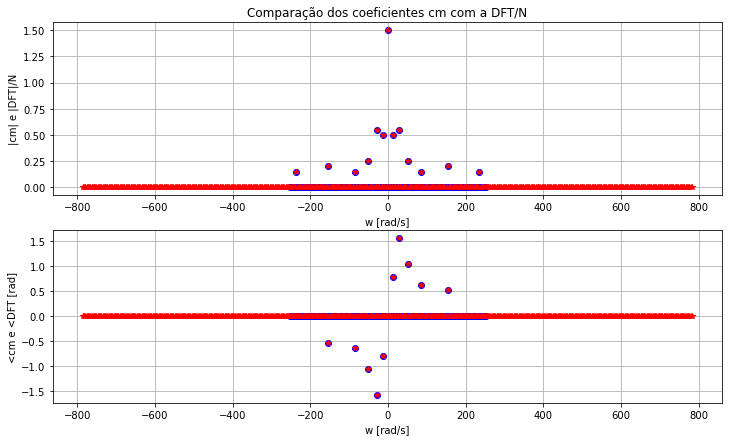

In [8]:
#--- Representação gráfica
plt.figure(figsize=(12,7))
plt.subplot(2,1,1)
plt.plot(m*w0,abs(cm),'bo',w,abs(X)/N,'r*')
plt.title('Comparação dos coeficientes cm com a DFT/N')
plt.ylabel('|cm| e |DFT|/N')
plt.xlabel('w [rad/s]')
plt.grid()
plt.subplot(2,1,2)
plt.plot(m*w0,np.unwrap(np.angle(cm)),'bo',w,np.unwrap(np.angle(X)),'r*')
plt.ylabel('<cm e <DFT [rad]')
plt.xlabel('w [rad/s]')
plt.grid()
plt.show()

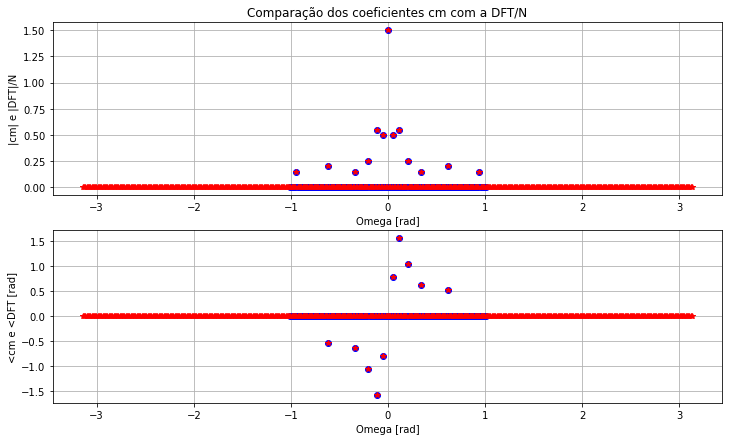

In [9]:
#--- Representação gráfica
plt.figure(figsize=(12,7))
plt.subplot(2,1,1)
plt.plot(m*Omega0,abs(cm),'bo',Omega,abs(X)/N,'r*')
plt.title('Comparação dos coeficientes cm com a DFT/N')
plt.ylabel('|cm| e |DFT|/N')
plt.xlabel('Omega [rad]')
plt.grid()
plt.subplot(2,1,2)
plt.plot(m*Omega0,np.unwrap(np.angle(cm)),'bo',Omega,np.unwrap(np.angle(X)),'r*')
plt.ylabel('<cm e <DFT [rad]')
plt.xlabel('Omega [rad]')
plt.grid()
plt.show()

**Exercício 1.2.** A partir da análise efetuada, identificar as componentes de frequência do sinal de tempo discreto $x[n]$ e do sinal de tempo contínuo $x(t)$.

In [10]:
print('FP7 - Exercício 1.2')

m=np.arange(0,m_max+1)
ind=np.where(Cm > 0.1)
print('Componentes de frequência do sinal x[n], m:')
print(m[ind])

print('Frequências do sinal x[n], Omega [rad]:')
omega_xn=m[ind]*2*np.pi/N
print(omega_xn)

print('Frequências do sinal x(t), w [rad/s]:')
w_xt=m[ind]*2*np.pi/T0   #w_xt=omega_xn/Ts
print(w_xt)

print('Frequências do sinal x(t), f [Hz]')
print(w_xt/2/np.pi)

FP7 - Exercício 1.2
Componentes de frequência do sinal x[n], m:
[ 0  4  9 16 27 49 75]
Frequências do sinal x[n], Omega [rad]:
[0.         0.05026548 0.11309734 0.20106193 0.33929201 0.61575216
 0.9424778 ]
Frequências do sinal x(t), w [rad/s]:
[  0.          12.56637061  28.27433388  50.26548246  84.82300165
 153.93804003 235.61944902]
Frequências do sinal x(t), f [Hz]
[ 0.   2.   4.5  8.  13.5 24.5 37.5]


**Exercício 2** Considerar o sinal periódico de tempo contínuo $x(t)=-1+3sin(50\pi t)+4cos(20\pi t+\pi/4)sin(40\pi t)$.

**Exercício 2.1** Aplicando o Teorema da Amostragem, escolher uma frequência de amostragem $f_s$ adequada, e que seja múltipla da frequência fundamental $f_0$. Obter a expressão de $x[n]$.

In [11]:
# Ex 2.1
print('FP7 - Exercício 2.1')

w0=10*np.pi
f0=w0/(2*np.pi)
print('f0 =',f0, 'Hz')

# Aplicando o Teorema da Amostragem, sabendo que fmax = 30 Hz
fs=65
print('fs =', fs, 'Hz')
ws=2*np.pi*fs
Ts=1/fs

t=sp.symbols('t')
n=sp.symbols('n')

xtt=-1+3*sp.sin(50*sp.pi*t)+4*sp.cos(20*sp.pi*t+sp.pi/4)*sp.sin(40*sp.pi*t)
print('xtt =', xtt)

xnn=xtt.subs(t,n*Ts)
print('xnn =', xnn)

# Expressão de x(t) de acordo com a formulação da Série de Fourier trigonométrica
# x(t) = 1 cos(pi) + 2 cos(20pi t - 3pi/4) + 3 cos(50pi t - pi/2) + 2 cos(60pi t - pi/4)
xtt1 = 1*sp.cos(sp.pi) + 2*sp.cos(20*sp.pi*t - 3*sp.pi/4) \
+3*sp.cos(50*sp.pi*t - sp.pi/2) + 2*sp.cos(60*sp.pi*t - sp.pi/4)
print('xtt1 =', xtt1)

FP7 - Exercício 2.1
f0 = 5.0 Hz
fs = 65 Hz
xtt = 4*sin(40*pi*t)*cos(20*pi*t + pi/4) + 3*sin(50*pi*t) - 1
xnn = 4*sin(0.615384615384615*pi*n)*cos(0.307692307692308*pi*n + pi/4) + 3*sin(0.769230769230769*pi*n) - 1
xtt1 = 3*sin(50*pi*t) + 2*sin(60*pi*t + pi/4) - 2*cos(20*pi*t + pi/4) - 1


**Exercício 2.2** Indicar as frequências angulares ($\omega$ e $\Omega$), as frequências fundamentais ($\omega_0$ e $\Omega_0$) e os períodos fundamentais ($T_0$ e $N$) dos sinais de tempo contínuo $x(t)$ e de tempo discreto $x[n]$.

In [12]:
# Ex 2.2
print('FP7 - Exercício 2.2')

print('w0 =', w0, 'rad/s')

Omega0=Ts*w0
print('Omega0 =', Omega0, 'rad')

T0=2*np.pi/w0
print('T0 =', T0, 's')

f0=1/T0;
N=int(T0/Ts)
print('N =', N)

if np.mod(N,2)==0:   # definição de w e Omega
    w=np.linspace(-ws/2,ws/2-ws/N,N)
    Omega=np.linspace(-np.pi,np.pi-2*np.pi/N,N)
else:
    w=np.linspace(-ws/2+ws/N/2,ws/2-ws/N/2,N)
    Omega=np.linspace(-np.pi+np.pi/N,np.pi-np.pi/N,N)

FP7 - Exercício 2.2
w0 = 31.41592653589793 rad/s
Omega0 = 0.48332194670612205 rad
T0 = 0.2 s
N = 13


**Exercício 2.3** Representar graficamente a sobreposição do sinal de tempo contínuo (com um passo temporal reduzido e traço contínuo) e o correspondente sinal amostrado (ponto a ponto).

FP7 - Exercício 2.3


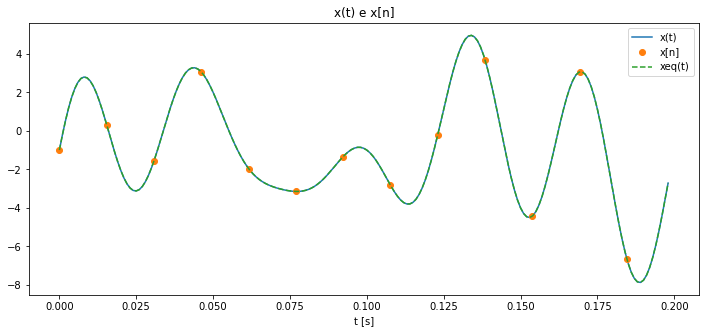

In [13]:
# Ex 2.3
print('FP7 - Exercício 2.3')
tt=np.arange(0,T0-0.001,0.001)

f=sp.lambdify(t,xtt,"numpy")
xt=f(tt)
f=sp.lambdify(t,xtt,"numpy")
xt1=f(tt)

nn=np.arange(0,N)
f=sp.lambdify(n,xnn,"numpy")
xn=f(nn)

plt.figure(figsize=(12,5))
plt.plot(tt,xt,label='x(t)')
plt.plot(nn*Ts,xn,'o',label='x[n]')
plt.plot(tt,xt1,'--',label='xeq(t)')
plt.xlabel('t [s]')
plt.title('x(t) e x[n]')
plt.legend(loc='upper right')
plt.show()

**Exercício 2.4** Determinar e representar graficamente a Transformada de Fourier Discreta (DFT) do sinal $x[n]$, usando as funções do Matlab *fft* e *fftshift*, em módulo e em fase, em função da frequência angular $\omega$ (em rad/s) e em função da frequência angular $\Omega$ (em rad).

FP7 - Exercício 2.4


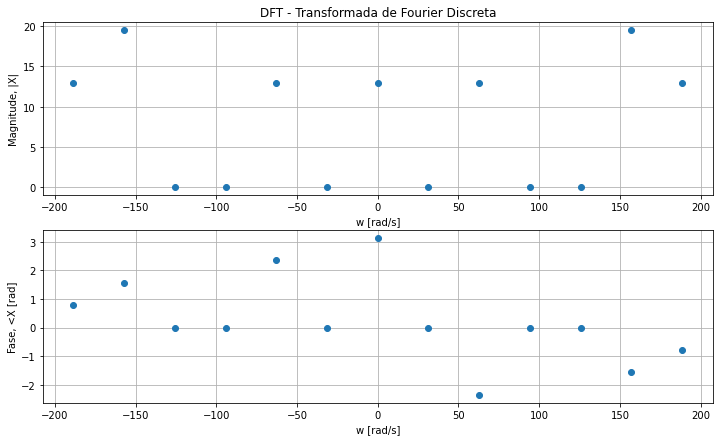

In [14]:
# Ex 2.4
print('FP7 - Exercício 2.4')

X=np.fft.fftshift(np.fft.fft(xn))    # DFT de x[n]
X[np.where(abs(X)<0.001)]=0      # anular valores residuais
abs_X = abs(X)
ang_X = np.angle(X)

#--- Representação gráfica
plt.figure(figsize=(12,7))
plt.subplot(2,1,1)
plt.plot(w,abs_X,'o')
plt.title('DFT - Transformada de Fourier Discreta')
plt.ylabel('Magnitude, |X|')
plt.xlabel('w [rad/s]')
plt.grid()
plt.subplot(2,1,2)
plt.plot(w,np.unwrap(ang_X),'o')
plt.ylabel('Fase, <X [rad]')
plt.xlabel('w [rad/s]')
plt.grid()
plt.show() 

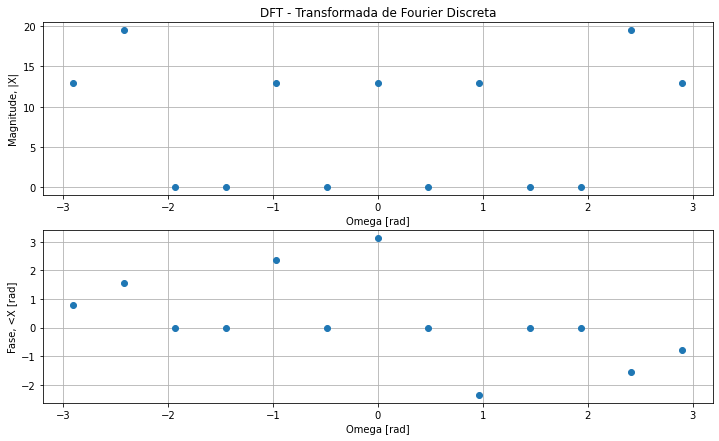

In [15]:
#--- Representação gráfica
plt.figure(figsize=(12,7))
plt.subplot(2,1,1)
plt.plot(Omega,abs_X,'o')
plt.title('DFT - Transformada de Fourier Discreta')
plt.ylabel('Magnitude, |X|')
plt.xlabel('Omega [rad]')
plt.grid()
plt.subplot(2,1,2)
plt.plot(Omega,np.unwrap(ang_X),'o')
plt.ylabel('Fase, <X [rad]')
plt.xlabel('Omega [rad]')
plt.grid()
plt.show() 

**Exercício 2.5** Determinar e representar graficamente os coeficientes da Série de Fourier complexa do sinal, $cm$, a partir da DFT.

FP7 - Exercício 2.5


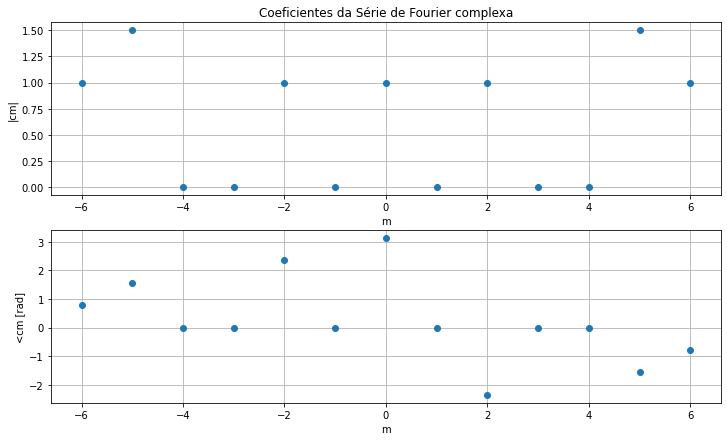

In [16]:
# Ex 2.5
print('FP7 - Exercício 2.5')
cm= X/N

#--- Representação gráfica
plt.figure(figsize=(12,7))
plt.subplot(2,1,1)
plt.plot(Omega/Omega0,abs(cm),'o')
plt.title('Coeficientes da Série de Fourier complexa')
plt.ylabel('|cm|')
plt.xlabel('m')
plt.grid()
plt.subplot(2,1,2)
plt.plot(Omega/Omega0,np.unwrap(np.angle(cm)),'o')
plt.ylabel('<cm [rad]')
plt.xlabel('m')
plt.grid()
plt.show() 

**Exercício 2.6** Determinar e representar graficamente os parâmetros da Série de Fourier trigonométrica ($Cm$ e $\theta m$) do sinal.

FP7 - Exercício 2.6


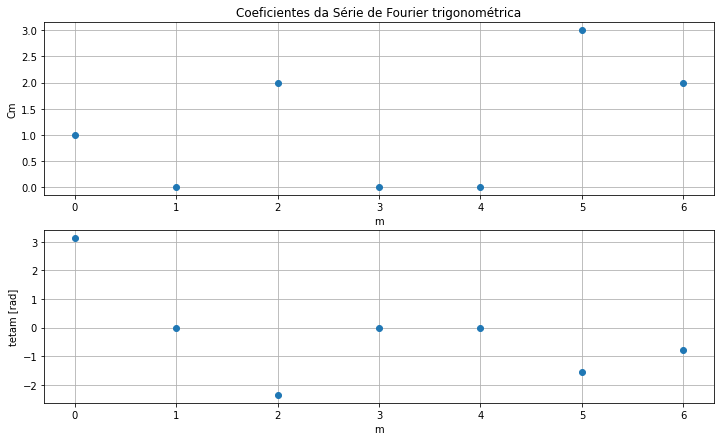

In [17]:
# Ex 2.6
print('FP7 - Exercício 2.6')

Cm=np.concatenate((abs(cm[np.where(Omega==0)]), 2.*abs(cm[np.where(Omega>0)])),axis=0)
tetam=np.angle(cm[np.where(Omega>=0)])

#--- Representação gráfica
plt.figure(figsize=(12,7))
plt.subplot(2,1,1)
plt.plot(Omega[np.where(Omega>=0)]/Omega0,Cm,'o')
plt.title('Coeficientes da Série de Fourier trigonométrica')
plt.ylabel('Cm')
plt.xlabel('m')
plt.grid()
plt.subplot(2,1,2)
plt.plot(Omega[np.where(Omega>=0)]/Omega0,tetam,'o')
plt.ylabel('tetam [rad]')
plt.xlabel('m')
plt.grid()
plt.show() 

**Exercício 2.7** Reconstruir o sinal $x(t)$ a partir dos parâmetros da Série de Fourier trigonométrica, obtidos em 2.6. Comparar graficamente com o sinal original.

FP7 - Exercício 2.7


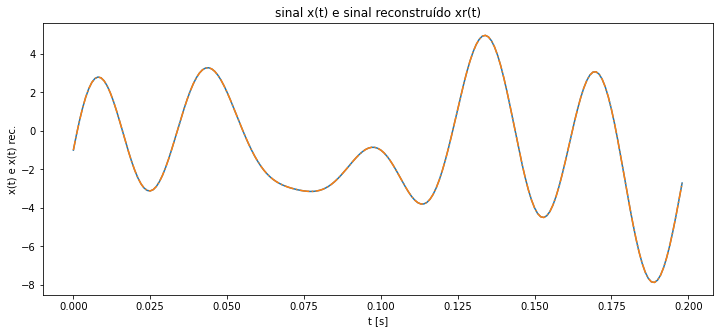

In [18]:
# Ex 2.7
print('FP7 - Exercício 2.7')

xtr=np.zeros_like(tt)

m_max = int(Omega[-1]/Omega0)

for m in range(m_max+1):
    xtr=xtr + Cm[m]*np.cos(m*w0*tt+tetam[m])

plt.figure(figsize=(12,5))
plt.plot(tt,xt,tt,xtr,'-.')
plt.title('sinal x(t) e sinal reconstruído xr(t)')
plt.xlabel('t [s]')
plt.ylabel('x(t) e x(t) rec.')
plt.show()